# K-Means Customer Segmentation

## Install Necessary Libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly
!pip install nbformat>=4.2.0

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\jupyter-trust.exe' -> 'C:\\Python311\\Scripts\\jupyter-trust.exe.deleteme'



# Import Neccesary Modules

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## K-Means on Synthetic Data

In [3]:
# Set random seed for reproducibility
np.random.seed(0)

In [4]:
# Generate synthetic data
# Create 4 clusters with different centers and standard deviations
# make_blobs generates isotropic Gaussian blobs for clustering.
# Isotropic means that the clusters are spherical and have the same variance in all directions.
# Gaussian blobs are clusters of points that follow a Gaussian distribution.
# A Gaussian distribution is a continuous probability distribution characterized by its bell-shaped curve.

# N_samples = number of samples, centers = number of clusters, cluster_std = standard deviation of clusters
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

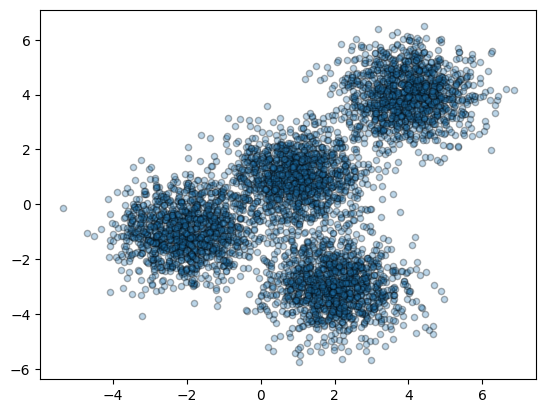

In [5]:
# Plot the generated data
# Create a scatter plot of the generated data points
# X[:,0] and X[:,1] are the x and y coordinates of the data points respectively.
# The marker is set to '.' for a dot-like appearance, alpha controls the transparency, ec (k = black) is edge color, and s is size.
plt.scatter(X[:,0], X[:,1],marker='.', alpha=0.3, ec='k',s=80)

## Setting Up K-Means

In [6]:
# Instantiate the KMeans class
# KMeans is a clustering algorithm that partitions the data into k clusters.
# The init parameter is the method for initialization, 
# n_clusters is the number of clusters to form, and 
# n_init is the number of times the algorithm will run with different centroid seeds.
k_means = KMeans(init= "k-means++", n_clusters=4, n_init=12)

In [7]:
# Fit the model to the data
# The fit method computes the k-means clustering.
# It assigns each sample to the nearest cluster center and updates the cluster centers based on the mean of the samples in each cluster.
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [8]:
# Get the cluster labels
# .labels_ are the labels of each point in the dataset, indicating which cluster it belongs to.
# Save the labels to variable k_means_labels for later use.
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [9]:
# Get the cluster centers
# .cluster_centers_ are the coordinates of the cluster centers.
# These are the points that represent the center of each cluster in the feature space.
# Save the cluster centers to variable k_means_cluster_centers for later use.
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

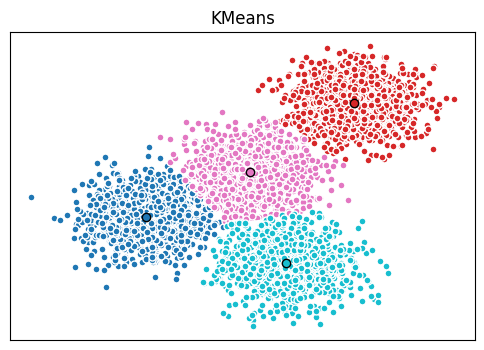

In [10]:
# Initialize the plot
fig = plt.figure(figsize=(6,4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
# cm = color map, np.linspace(0,1,len(set(k_means_labels))) = evenly spaced values in the range [0, 1]
colors = plt.cm.tab10(np.linspace(0,1,len(set(k_means_labels))))

# create the plot
ax = fig.add_subplot(1,1,1)

# For loop to plot the points and centroids
# k will range from 0 to 3 (4 clusters), col will be the color for each cluster.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # create a list of all data and if they belong, they are labelled as true and if not they are false.
    my_members = (k_means_labels == k)
    # Define the cluster center for the current cluster
    cluster_center = k_means_cluster_centers[k]
    # Plot the data points that belong to the current cluster
    ax.plot(X[my_members, 0], X[my_members, 1],'w', markerfacecolor=col, marker='.', ms=10)
    # Plot the cluster center
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title
ax.set_title('KMeans')

# Remove x and y ticks
ax.set_xticks(())
ax.set_yticks(())

# Show the plot
plt.show()

## Exercise 1

In [11]:
# What if k=3 instead of 4?
k_means = KMeans(init= "k-means++", n_clusters=3, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.70503248,  3.70030577],
       [-0.8042542 , -0.16952334],
       [ 2.02030226, -2.94614399]])

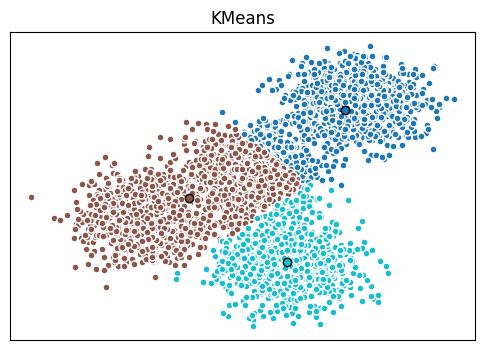

In [12]:
# Initialize the plot
fig = plt.figure(figsize=(6,4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
# cm = color map, np.linspace(0,1,len(set(k_means_labels))) = evenly spaced values in the range [0, 1]
colors = plt.cm.tab10(np.linspace(0,1,len(set(k_means_labels))))

# create the plot
ax = fig.add_subplot(1,1,1)

# For loop to plot the points and centroids
# k will range from 0 to 3 (4 clusters), col will be the color for each cluster.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # create a list of all data and if they belong, they are labelled as true and if not they are false.
    my_members = (k_means_labels == k)
    # Define the cluster center for the current cluster
    cluster_center = k_means_cluster_centers[k]
    # Plot the data points that belong to the current cluster
    ax.plot(X[my_members, 0], X[my_members, 1],'w', markerfacecolor=col, marker='.', ms=10)
    # Plot the cluster center
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title
ax.set_title('KMeans')

# Remove x and y ticks
ax.set_xticks(())
ax.set_yticks(())

# Show the plot
plt.show()

I observe that when k=3, the clusters grew to fill the space left over by the 4th cluster from the original code. Most noticeably, the pink cluster from before has now mostly become the large brown cluster seen in k=3.

## Exercise 2

In [13]:
# What if k=5 instead of 4 or 3?
k_means = KMeans(init= "k-means++", n_clusters=5, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.13677632, -0.25701822],
       [ 3.97929125,  3.99329743],
       [ 2.00535715, -3.0241187 ],
       [ 1.09955667,  1.06624999],
       [-2.42666081, -1.36976411]])

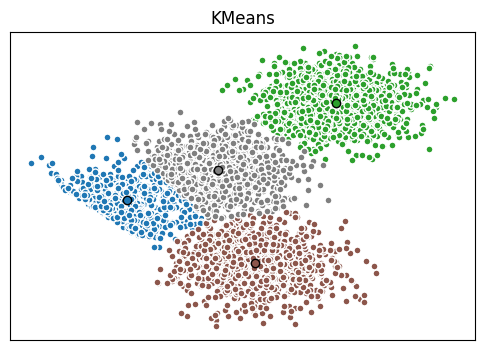

In [14]:
# Initialize the plot
fig = plt.figure(figsize=(6,4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
# cm = color map, np.linspace(0,1,len(set(k_means_labels))) = evenly spaced values in the range [0, 1]
colors = plt.cm.tab10(np.linspace(0,1,len(set(k_means_labels))))

# create the plot
ax = fig.add_subplot(1,1,1)

# For loop to plot the points and centroids
# k will range from 0 to 3 (4 clusters), col will be the color for each cluster.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # create a list of all data and if they belong, they are labelled as true and if not they are false.
    my_members = (k_means_labels == k)
    # Define the cluster center for the current cluster
    cluster_center = k_means_cluster_centers[k]
    # Plot the data points that belong to the current cluster
    ax.plot(X[my_members, 0], X[my_members, 1],'w', markerfacecolor=col, marker='.', ms=10)
    # Plot the cluster center
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title
ax.set_title('KMeans')

# Remove x and y ticks
ax.set_xticks(())
ax.set_yticks(())

# Show the plot
plt.show()

I observe that there was an odd distortion in the data. It seems that the data set on the blue cluster had an error where it disappeared. Maybe it's not generated correctly. However, the other clusters seem the same, but there is only 4 clusters when it was set to 5. The coding might need to be adjusted more than simply changing n_clusters=4. 

This might be due to the centroids not having a specific label for the 5th cluster.

We previously hardcoded the centroid labels and they were four of them. When adding a 5th cluster, the label didn't exist, so all plotable data bound for the 5th cluster's area ultimately were not plotted based on the boolean array 'my_members'.

## Customer Segmentation with K-Means

### Load Data from a CSV file

In [15]:
cust_df = pd.read_csv("..\Original Notebooks from IBM\Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


### Preprocessing

In [16]:
cust_df = cust_df.drop('Address', axis=1)

In [17]:
# Drop NaN values from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


### Normalizing over the Standard Deviation

In [18]:
X = cust_df.values[:,1:] # leave out 'Customer ID' column
Clus_dataSet = StandardScaler().fit_transform(X) # standardize the data

## Modeling

In [19]:
clusterNum = 3 # number of clusters
k_means = KMeans(init= "k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_

In [20]:
cust_df['Clus_km'] = labels # add cluster labels to the dataframe
cust_df.groupby('Clus_km').mean() # group by cluster and get mean values for each cluster

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


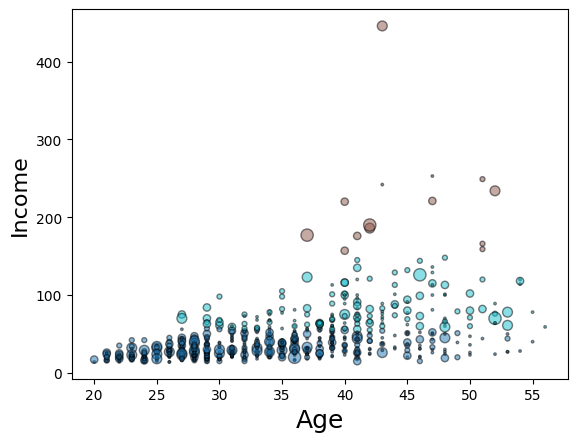

In [21]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [ ]:
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()


In [ ]:
# There are several profiles in the dataset, but I will only focus on 3 of them:
# 1. Yellow - Moderate income, around 45 years old, trending towards 1 or 2 on the education scale.
# 2. Purple - High income, around between 35 and 55 years old, at a variety of education levels.
# 3. Blue - Low income (below 50k), all age groups, between 1 and 3 on the education scale with some in the 4s and one 5.

## Observations
There are several profiles in the dataset, but I will only focus on 3 of them:
1. Yellow - Moderate income, around 45 years old, trending towards 1 or 2 on the education scale.
2. Purple - High income, around between 35 and 55 years old, at a variety of education levels.
3. Blue - Low income (below 50k), all age groups, between 1 and 3 on the education scale with some in the 4s and one 5.